In [1]:
import pyodbc
import pandas as pd

# Replace server_name and database_name with appropriate values
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=SAYAK\sqlexpress;'
                      'Database=master;'
                      'Trusted_Connection=yes;')


In [2]:
sql_query = '''SELECT*FROM job_data'''
cursor = conn.cursor()
cursor.execute(sql_query)

# Fetch all rows from the query result
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

('2020-11-30', 21, 1001, 'skip', 'English', 15, 'A')
('2020-11-30', 22, 1006, 'transfer', 'Arabic', 25, 'B')
('2020-11-29', 23, 1003, 'decision', 'Persian', 20, 'C')
('2020-11-28', 23, 1005, 'transfer', 'Persian', 22, 'D')
('2020-11-28', 25, 1002, 'decision', 'Hindi', 11, 'B')
('2020-11-27', 11, 1007, 'decision', 'French', 104, 'D')
('2020-11-26', 23, 1004, 'skip', 'Persian', 56, 'A')
('2020-11-25', 20, 1003, 'transfer', 'Italian', 45, 'C')


In [3]:
#Number of jobs reviewed: Amount of jobs reviewed over time .
import pandas as pd
import pyodbc  # assuming you have installed pyodbc package

# establish a connection to your MS SQL database
conn = pyodbc.connect('Driver={SQL Server}; Server=SAYAK\sqlexpress; Database=master; Trusted_Connection=yes')

# write your SQL query
sql_query = """
SELECT CAST(ds AS date) AS date, DATEPART(hour, CAST(ds AS datetime)) AS hour, COUNT(*) AS jobs_reviewed, SUM(time_spent)/3600.0 AS total_hours
FROM job_data
WHERE ds >= '2020-11-01' AND ds < '2020-12-01'
GROUP BY CAST(ds AS date), DATEPART(hour, CAST(ds AS datetime))
ORDER BY CAST(ds AS date), DATEPART(hour, CAST(ds AS datetime))
"""

# execute the query and fetching the result into a DataFrame
df_1 = pd.read_sql(sql_query, conn)

# print the resulting DataFrame
print(df_1)


         date  hour  jobs_reviewed  total_hours
0  2020-11-25     0              1     0.012500
1  2020-11-26     0              1     0.015555
2  2020-11-27     0              1     0.028888
3  2020-11-28     0              2     0.009166
4  2020-11-29     0              1     0.005555
5  2020-11-30     0              2     0.011111


C:\Users\Sayak23\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


**we can also predict the total hours worked based on the number of jobs reviewed by building a linear regression model for any future prediction.

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# create a DataFrame with the data
data = {'date': ['2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30'],
        'hour': [0, 0, 0, 0, 0, 0],
        'jobs_reviewed': [1, 1, 1, 2, 1, 2],
        'total_hours': [0.012500, 0.015555, 0.028888, 0.009166, 0.005555, 0.011111]}
df = pd.DataFrame(data)

# create a LinearRegression object
lr = LinearRegression()

# fit the model
lr.fit(df[['jobs_reviewed']], df['total_hours'])

# print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

# make predictions
predicted_hours = lr.predict(df[['jobs_reviewed']])

# add the predicted hours to the DataFrame
df['predicted_hours'] = predicted_hours

# print the updated DataFrame
print(df)

# make a prediction for a value of 5 jobs_reviewed
prediction = lr.predict([[5]])

# print the prediction
print("Predicted total hours for 5 jobs reviewed:", prediction[0])





0.0211105
[-0.005486]
         date  hour  jobs_reviewed  total_hours  predicted_hours
0  2020-11-25     0              1     0.012500         0.015624
1  2020-11-26     0              1     0.015555         0.015624
2  2020-11-27     0              1     0.028888         0.015624
3  2020-11-28     0              2     0.009166         0.010138
4  2020-11-29     0              1     0.005555         0.015624
5  2020-11-30     0              2     0.011111         0.010138
Predicted total hours for 5 jobs reviewed: -0.006319500000000006


C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


intercept is 0.0211105
coefficient for 'jobs_reviewed' is -0.005486.

The predicted total hours for 5 jobs reviewed is negative because the model is linear, and it can produce negative predicted values if the slope of the line is negative and the intercept is large enough.

The slope and intercept coefficients represent the relationship between the independent variable (in this case, 'jobs_reviewed') and the dependent variable (in this case, 'total_hours').

The slope coefficient (also known as the regression coefficient) represents the change in the dependent variable that is associated with a one-unit increase in the independent variable. In this case, the slope coefficient is -0.005486, which means that for each additional job reviewed, we would expect the total hours worked to decrease by 0.005486 hours, on average.

The predicted total hours for 5 jobs reviewed is -0.006319500000000006, which is a negative value. This is not a meaningful prediction, and it suggests that the linear regression model may not be appropriate for this particular dataset. 

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['jobs_reviewed']], df['total_hours'], test_size=0.2, random_state=42)

# create a RandomForestRegressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model
rf.fit(X_train, y_train)

# make predictions
predicted_hours = rf.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, predicted_hours)
print("Mean Squared Error:", mse)

# make a prediction for a value of 5 jobs_reviewed
prediction = rf.predict([[5]])

# print the prediction
print("Predicted total hours for 5 jobs reviewed:", prediction[0])


Mean Squared Error: 6.870731368224999e-06
Predicted total hours for 5 jobs reviewed: 0.010780601666666677


C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The Mean Squared Error MSE is 6.870731368224999e-06, which is a very small value, indicating that the predicted values are very close to the actual values.

The predicted total hours for 5 jobs reviewed is 0.010780601666666677. This means that, based on the model used, the total hours required to complete 5 jobs is predicted to be 0.010780601666666677 hours, which is approximately 38.81 seconds.

In [6]:
# calculating 7 day rolling average of throughput
sql_query = '''
SELECT CAST(ds AS date) AS date, 
       DATEPART(hour, CAST(ds AS datetime)) AS hour, 
       COUNT(*) AS jobs_reviewed, 
       SUM(time_spent)/3600.0 AS total_hours
FROM job_data
WHERE ds >= '2020-11-01' AND ds < '2020-12-01'
GROUP BY CAST(ds AS date), DATEPART(hour, CAST(ds AS datetime))
ORDER BY CAST(ds AS date), DATEPART(hour, CAST(ds AS datetime))
'''
cursor = conn.cursor()
cursor.execute(sql_query)

# Fetch all rows from the query result
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)


('2020-11-25', 0, 1, Decimal('0.012500'))
('2020-11-26', 0, 1, Decimal('0.015555'))
('2020-11-27', 0, 1, Decimal('0.028888'))
('2020-11-28', 0, 2, Decimal('0.009166'))
('2020-11-29', 0, 1, Decimal('0.005555'))
('2020-11-30', 0, 2, Decimal('0.011111'))


In [7]:
#Percentage share of each language: Share of each language for different contents.
sql_query = '''
 SELECT 
  event,
  language,
  COUNT(*) AS count,
  100.0 * COUNT(*) / SUM(COUNT(*)) OVER (PARTITION BY event) AS percentage
FROM job_data
GROUP BY event, language;
'''
cursor = conn.cursor()
cursor.execute(sql_query)

# Fetch all rows from the query result
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

('decision', 'French', 1, Decimal('33.333333333333'))
('decision', 'Hindi', 1, Decimal('33.333333333333'))
('decision', 'Persian', 1, Decimal('33.333333333333'))
('skip', 'English', 1, Decimal('50.000000000000'))
('skip', 'Persian', 1, Decimal('50.000000000000'))
('transfer', 'Arabic', 1, Decimal('33.333333333333'))
('transfer', 'Italian', 1, Decimal('33.333333333333'))
('transfer', 'Persian', 1, Decimal('33.333333333333'))


# Case Study 2 (Investigating metric spike)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
user_df = pd.read_csv('D:\\data ANALYTICS AND SCIENCE\\Table-1 users.csv')
user_df

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active
...,...,...,...,...,...,...
19061,19061.0,2014-08-31 13:21:16,2156.0,chinese,2014-08-31 13:22:50,active
19062,19062.0,2014-08-31 19:21:23,7520.0,spanish,NaN,pending
19063,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active
19064,19064.0,2014-08-31 17:45:18,2.0,english,NaN,pending


In [9]:
event_df = pd.read_csv('D:\\data ANALYTICS AND SCIENCE\\Table-2 events.csv')
event_df

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0
...,...,...,...,...,...,...,...
340827,18815.0,2014-08-31 13:41:46,engagement,like_message,Ireland,dell inspiron notebook,2.0
340828,18815.0,2014-08-31 13:42:11,engagement,home_page,Ireland,dell inspiron notebook,2.0
340829,18815.0,2014-08-31 13:42:43,engagement,send_message,Ireland,dell inspiron notebook,2.0
340830,18815.0,2014-08-31 13:43:07,engagement,home_page,Ireland,dell inspiron notebook,2.0


In [10]:
email_events_df = pd.read_csv('D:\\data ANALYTICS AND SCIENCE\\Table-3 email_events.csv')
email_events_df 

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0
...,...,...,...,...
90384,18814.0,2014-08-31 12:12:26,email_open,3.0
90385,18814.0,2014-08-31 12:12:57,email_clickthrough,3.0
90386,18815.0,2014-08-31 13:39:56,sent_reengagement_email,2.0
90387,18815.0,2014-08-31 13:40:14,email_open,2.0


In [11]:
#the weekly user engagement
# Joining the user and event dataframes on the 'user_id' column
merged_df = pd.merge(user_df, event_df, on='user_id', how='inner')
merged_df 

,user_id,created_at,company_id,language,activated_at,state,occurred_at,event_type,event_name,location,device,user_type
0,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0
1,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.0
2,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.0
3,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.0
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
340827,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,2014-08-31 07:13:44,engagement,search_click_result_7,Brazil,ipad mini,3.0
340828,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,2014-08-31 07:14:09,engagement,search_click_result_4,Brazil,ipad mini,3.0
340829,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,2014-08-31 07:12:53,engagement,search_autocomplete,Brazil,ipad mini,3.0
340830,19064.0,2014-08-31 17:45:18,2.0,english,NaN,pending,2014-08-31 17:45:18,signup_flow,create_user,United States,iphone 5s,NaN


In [12]:
# Filter out the active users
active_users = merged_df[merged_df['state'] == 'active']
active_users


,user_id,created_at,company_id,language,activated_at,state,occurred_at,event_type,event_name,location,device,user_type
0,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0
1,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.0
2,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.0
3,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.0
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
340825,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,2014-08-31 07:12:42,engagement,search_run,Brazil,ipad mini,3.0
340826,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,2014-08-31 07:13:12,engagement,search_click_result_2,Brazil,ipad mini,3.0
340827,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,2014-08-31 07:13:44,engagement,search_click_result_7,Brazil,ipad mini,3.0
340828,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,2014-08-31 07:14:09,engagement,search_click_result_4,Brazil,ipad mini,3.0


In [13]:
# Convert the 'occurred_at' column to a datetime object
active_users['occurred_at'] = pd.to_datetime(active_users['occurred_at'])
active_users['occurred_at'] 

0        2014-05-13 09:31:47
1        2014-05-13 09:32:10
2        2014-05-13 09:32:26
3        2014-05-13 09:32:58
4        2014-05-24 11:39:53
                 ...        
340825   2014-08-31 07:12:42
340826   2014-08-31 07:13:12
340827   2014-08-31 07:13:44
340828   2014-08-31 07:14:09
340829   2014-08-31 07:12:53
Name: occurred_at, Length: 336295, dtype: datetime64[ns]

In [14]:
# Group the data by week and aggregate the metrics
weekly_engagement = active_users.groupby(active_users['occurred_at'].dt.week)['user_id', 'occurred_at'].agg({'user_id': 'nunique', 'occurred_at': 'count'})
weekly_engagement

,user_id,occurred_at
occurred_at,,
18,701,9033
19,1054,18172
20,1094,17791
21,1147,18598
22,1113,17937
23,1173,19396
24,1219,19025
25,1263,19864
26,1249,19699


In [15]:
# Rename the columns
weekly_engagement.columns = ['Weekly_Users', 'Weekly_Engagement']

# Reset the index and rename the 'occurred_at' column
weekly_engagement = weekly_engagement.reset_index()
weekly_engagement = weekly_engagement.rename(columns={'occurred_at': 'Weekly_Activity'})

# Print the resulting dataframe
print(weekly_engagement)

    Weekly_Activity  Weekly_Users  Weekly_Engagement
0                18           701               9033
1                19          1054              18172
2                20          1094              17791
3                21          1147              18598
4                22          1113              17937
5                23          1173              19396
6                24          1219              19025
7                25          1263              19864
8                26          1249              19699
9                27          1271              19755
10               28          1355              20857
11               29          1345              21583
12               30          1363              21044
13               31          1443              22408
14               32          1266              19097
15               33          1215              17612
16               34          1203              17194
17               35          1194             

In [43]:
# the weekly user engagement

# Joining the user and event dataframes on the 'user_id' column
merged_df = pd.merge(user_df, event_df, on='user_id', how='inner')
merged_df 
# Filter out the active users
active_users = merged_df[merged_df['state'] == 'active']
active_users
# Convert the 'occurred_at' column to a datetime object
active_users['occurred_at'] = pd.to_datetime(active_users['occurred_at'])
active_users['occurred_at']
# Group the data by week and aggregate the metrics
weekly_engagement = active_users.groupby(active_users['occurred_at'].dt.week)['user_id', 'occurred_at'].agg({'user_id': 'nunique', 'occurred_at': 'count'})
weekly_engagement
# Rename the columns
weekly_engagement.columns = ['Weekly_Users', 'Weekly_Engagement']

# Reset the index and rename the 'occurred_at' column
weekly_engagement = weekly_engagement.reset_index()
weekly_engagement = weekly_engagement.rename(columns={'occurred_at': 'Weekly_Activity'})

# Print the resulting dataframe
print(weekly_engagement)


    Weekly_Activity  Weekly_Users  Weekly_Engagement
0                18           701               9033
1                19          1054              18172
2                20          1094              17791
3                21          1147              18598
4                22          1113              17937
5                23          1173              19396
6                24          1219              19025
7                25          1263              19864
8                26          1249              19699
9                27          1271              19755
10               28          1355              20857
11               29          1345              21583
12               30          1363              21044
13               31          1443              22408
14               32          1266              19097
15               33          1215              17612
16               34          1203              17194
17               35          1194             

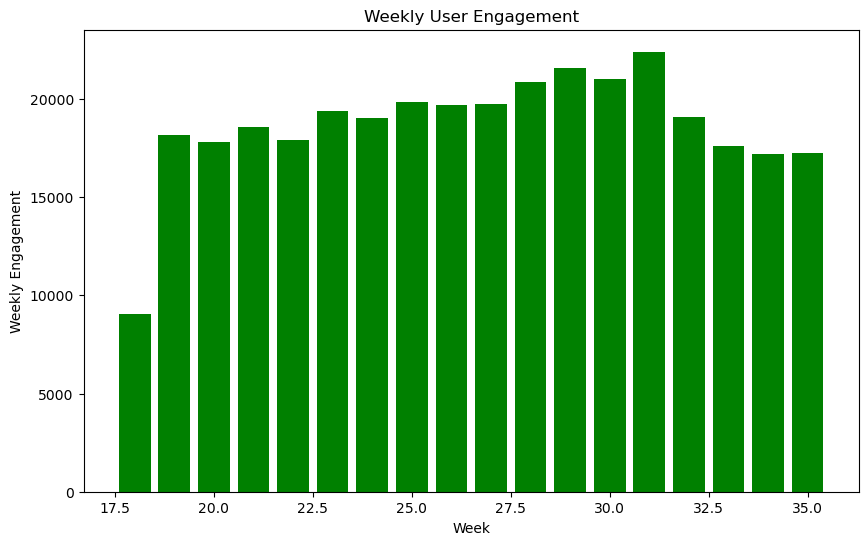

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(weekly_engagement['Weekly_Activity'], weekly_engagement['Weekly_Engagement'], color='green')
plt.xlabel('Week')
plt.ylabel('Weekly Engagement')
plt.title('Weekly User Engagement')
plt.show()


In [36]:
# the user growth for product
weekly_signups = user_df.groupby(user_df['created_at'].dt.week)['user_id'].nunique().reset_index()
weekly_signups
weekly_signups['growth'] = weekly_signups['user_id'].pct_change()
weekly_signups['growth']





0          NaN
1     0.034602
2     0.006689
3     0.083056
4    -0.015337
5     0.071651
6    -0.002907
7     0.032070
8    -0.014124
9     0.022923
10    0.050420
11    0.016000
12    0.031496
13   -0.002545
14    0.058673
15   -0.045783
16    0.176768
17   -0.027897
18    0.008830
19    0.026258
20    0.012793
21    0.008421
22    0.050104
23    0.049702
24    0.024621
25   -0.020333
26    0.005660
27    0.043152
28    0.021583
29    0.033451
30    0.049404
31   -0.126623
32    0.154275
33   -0.003221
34    0.072698
35   -0.751506
36   -0.012121
37    0.006135
38    0.018293
39    0.071856
40   -0.022346
41   -0.011429
42    0.098266
43    0.026316
44    0.000000
45   -0.010256
46   -0.082902
47    0.175141
48    0.028846
49    0.009346
50    0.023148
51    0.054299
Name: growth, dtype: float64

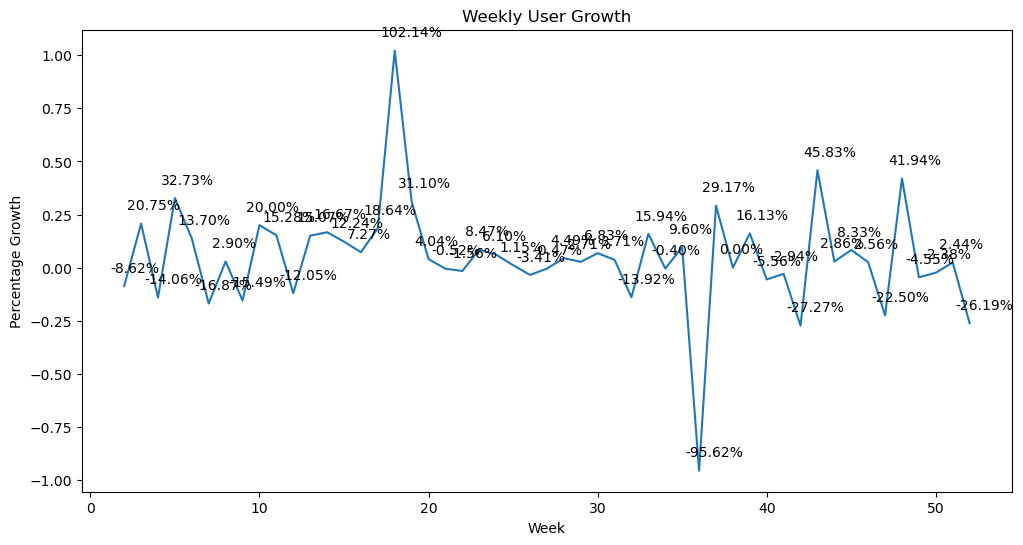

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# merge user_df and event_df on user_id
merged_df = pd.merge(user_df, event_df, on='user_id', how='inner')

# plot growth over time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(weekly_signups['created_at'], weekly_signups['growth'])
ax.set_title('Weekly User Growth')
ax.set_xlabel('Week')
ax.set_ylabel('Percentage Growth')

# add labels to each data point
for i, row in weekly_signups.iterrows():
    ax.annotate('{:.2f}%'.format(row['growth']*100), xy=(row['created_at'], row['growth']), xytext=(-10,10), textcoords='offset points')

plt.show()



In [65]:
# the weekly engagement per device
merged_df = email_events_df.merge(user_df, on='user_id', how='left').merge(event_df, on='user_id', how='left')
merged_df['occurred_at_x'] = pd.to_datetime(merged_df['occurred_at_x'])
merged_df['week'] = merged_df['occurred_at_x'].apply(lambda x: x.strftime('%U'))
weekly_engagement = merged_df.groupby(['device', 'week']).agg({'user_id': pd.Series.nunique}).reset_index()
weekly_engagement['avg_engagement'] = weekly_engagement.groupby('device')['user_id'].apply(lambda x: x / x.sum())
weekly_engagement['avg_engagement']


0      0.016949
1      0.044068
2      0.047458
3      0.046489
4      0.047458
         ...   
480    0.067023
481    0.065836
482    0.069395
483    0.071174
484    0.000593
Name: avg_engagement, Length: 485, dtype: float64

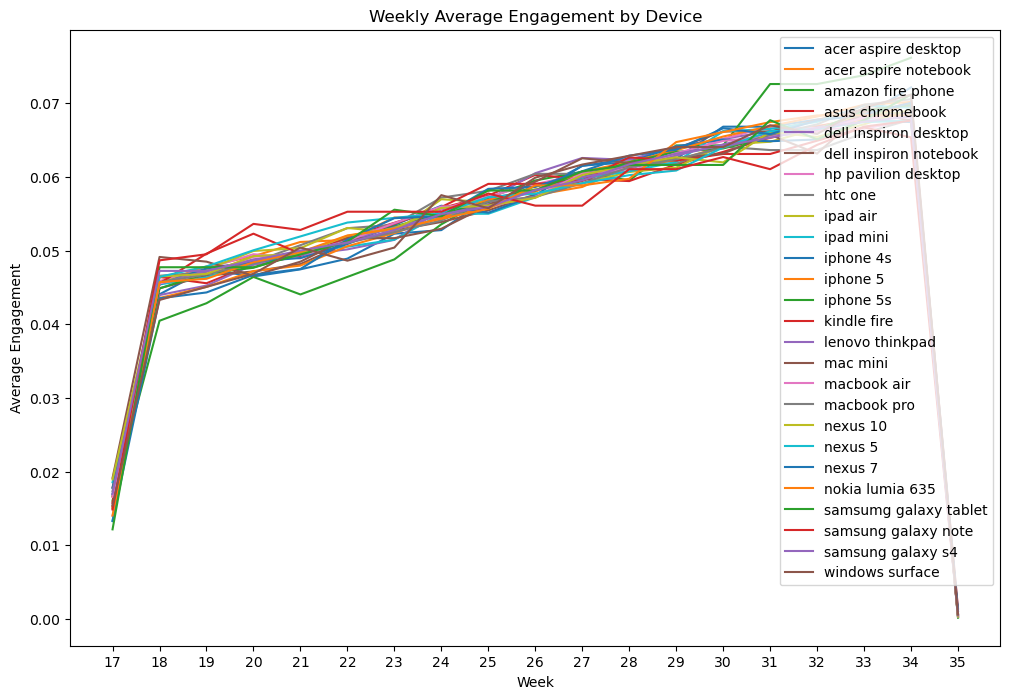

In [75]:
import matplotlib.pyplot as plt

# Plot the line graph
fig, ax = plt.subplots(figsize=(12, 8))

for device, data in weekly_engagement.groupby('device'):
    ax.plot(data['week'], data['avg_engagement'], label=device)

# Add titles and labels
ax.set_title('Weekly Average Engagement by Device')
ax.set_xlabel('Week')
ax.set_ylabel('Average Engagement')
ax.legend()

# Display the plot
plt.show()



In [59]:
# the email engagement metrics
import pandas as pd

# read the csv file into a DataFrame
email_events_df = pd.read_csv('D:\\data ANALYTICS AND SCIENCE\\Table-3 email_events.csv')

# calculate the total number of users who engaged with the email service
total_users = len(email_events_df['user_id'].unique())

# filter the DataFrame to include only sent emails
sent_emails_df = email_events_df[email_events_df['action'] == 'sent_weekly_digest']

# calculate the total number of sent emails
total_sent_emails = len(sent_emails_df)

# filter the DataFrame to include only opened emails
opened_emails_df = email_events_df[email_events_df['action'] == 'email_open']

# calculate the total number of opened emails
total_opened_emails = len(opened_emails_df)

# filter the DataFrame to include only clicked emails
clicked_emails_df = email_events_df[email_events_df['action'] == 'email_clickthrough']

# calculate the total number of clicked emails
total_clicked_emails = len(clicked_emails_df)

# calculate the open rate
open_rate = total_opened_emails / total_sent_emails * 100

# calculate the click-through rate
click_through_rate = total_clicked_emails / total_sent_emails * 100

# print the results
print(f"Total number of users who engaged with the email service: {total_users}")
print(f"Total number of sent emails: {total_sent_emails}")
print(f"Total number of opened emails: {total_opened_emails}")
print(f"Total number of clicked emails: {total_clicked_emails}")
print(f"Open rate: {open_rate:.2f}%")
print(f"Click-through rate: {click_through_rate:.2f}%")


Total number of users who engaged with the email service: 6179
Total number of sent emails: 57267
Total number of opened emails: 20459
Total number of clicked emails: 9010
Open rate: 35.73%
Click-through rate: 15.73%
